### DM-02 Assignment 1  

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#### Parameters

In [2]:
%config InlineBackend.figure_formats = {'png', 'retina'}  # for high-reso graph
plt.rcParams['font.family'] = 'Yu Mincho' # for Japanese in graph (Win10)

csv_in = '../ai-0102/pandas_training-utf8.csv'

#### Read CSV file

In [3]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=13, header=0)
print(df.shape)
print(df.info())
display(df.head())

(440, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
CHANNEL      440 non-null object
REGION       440 non-null object
FRESH        440 non-null int64
MILK         440 non-null int64
GROCERY      440 non-null int64
FROZEN       440 non-null int64
DET_PAPER    440 non-null int64
DELICA       440 non-null int64
dtypes: int64(6), object(2)
memory usage: 27.6+ KB
None


,CHANNEL,REGION,FRESH,MILK,GROCERY,FROZEN,DET_PAPER,DELICA
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Horeca,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


#### Extract FRESH >= 20000

In [4]:
df2 = df[ df['FRESH']>=20000 ].reset_index(drop=True)
print(df2.shape)
print(df2.info())
display(df2.head())

(80, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
CHANNEL      80 non-null object
REGION       80 non-null object
FRESH        80 non-null int64
MILK         80 non-null int64
GROCERY      80 non-null int64
FROZEN       80 non-null int64
DET_PAPER    80 non-null int64
DELICA       80 non-null int64
dtypes: int64(6), object(2)
memory usage: 5.1+ KB
None


,CHANNEL,REGION,FRESH,MILK,GROCERY,FROZEN,DET_PAPER,DELICA
0,Retail,Other,22615,5410,7198,3915,1777,5185
1,Retail,Other,31714,12319,11757,287,3881,2931
2,Retail,Other,21217,6208,14982,3095,6707,602
3,Retail,Other,24653,9465,12091,294,5058,2168
4,Horeca,Other,31276,1917,4469,9408,2381,4334


#### Multiple box plot

,FRESH,MILK,GROCERY,FROZEN,DET_PAPER,DELICA
0,22615,5410,7198,3915,1777,5185
1,31714,12319,11757,287,3881,2931
2,21217,6208,14982,3095,6707,602
3,24653,9465,12091,294,5058,2168
4,31276,1917,4469,9408,2381,4334


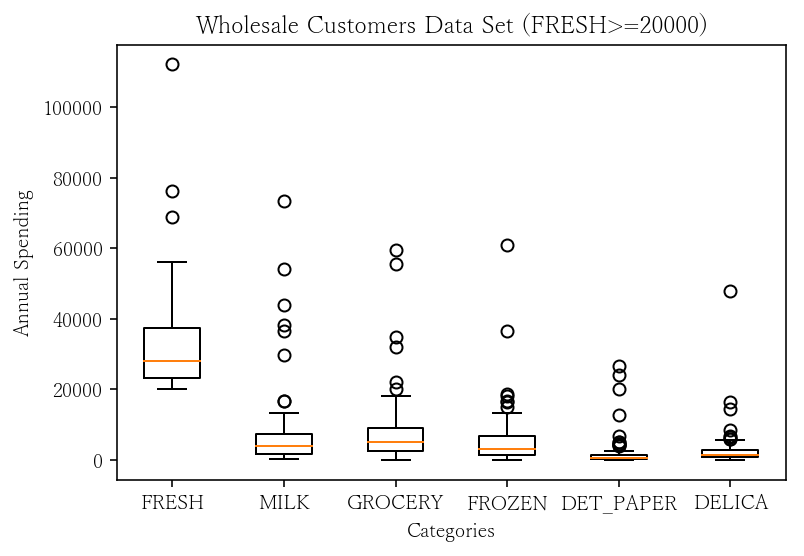

In [5]:
df_num = df2.loc[:, 'FRESH':]
display(df_num.head())
plt.boxplot(np.array(df_num))
plt.title('Wholesale Customers Data Set (FRESH>=20000)')
plt.xticks(range(1,df_num.shape[1]+1),df_num.columns)  # set xticklabels to columns
plt.xlabel('Categories')
plt.ylabel('Annual Spending')
plt.show()

#### Obtain mean value  

FRESH        32828.6750
MILK          7645.3375
GROCERY       8059.8375
FROZEN        5760.1875
DET_PAPER     2098.8000
dtype: float64


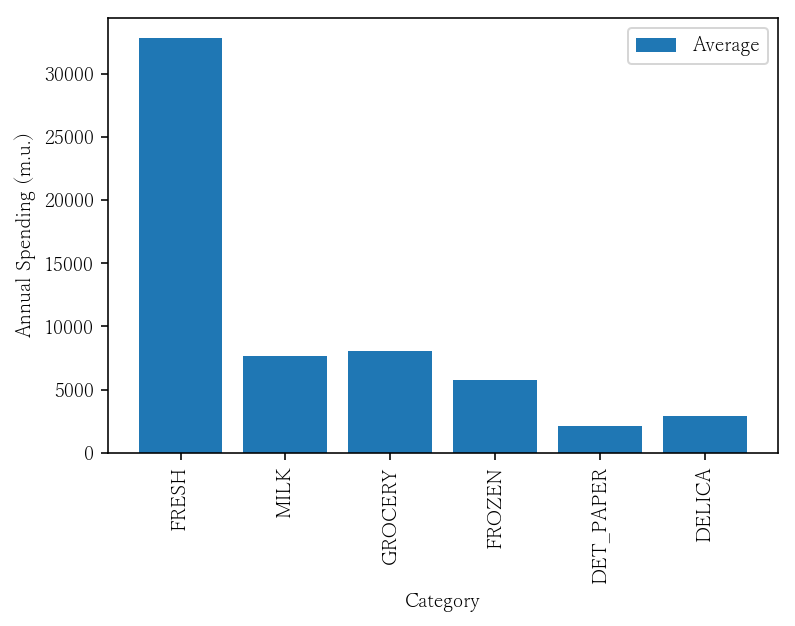

In [6]:
ser_ave = df2.mean()
print(ser_ave.head())  # debug
plt.bar(ser_ave.index, ser_ave, label='Average')
plt.xlabel('Category')
plt.ylabel('Annual Spending (m.u.)')
plt.xticks(rotation=90)
plt.legend()
plt.show()